In [34]:
from idf_analysis.idf_class import IntensityDurationFrequencyAnalyse
from idf_analysis.definitions import *
import pandas as pd
from os import path
%matplotlib inline

In [35]:
output_directory = path.join('example', 'EXAMPLE_data')

# Intensity Duration Frequency Analyse

## Parameter

**series_kind**:

`PARTIAL` = Partielle Serie (partial duration series, PDS) (peak over threshold, POT)

`ANNUAL` = Jährliche Serie (annual maximum series, AMS)

**worksheet**:

`DWA`:
- DWA-A 531
- KOSTRA - empfohlen
- Stützstellen: 60min und 12h

`DWA-adv`:
- DWA-A 531
- Unterscheidung in überwiegend konvektiv und advektiv verursachte Starkregen
- Stützstellen: 3h und 24h

`ATV`:
- ATV-A 121
- Stützstellen: 3h und 48h

**extended_durations** = Inkludiert die Dauerstufen `[720, 1080, 1440, 2880, 4320, 5760, 7200, 8640]` in der Analyse (in Minutesn)

Standardmäßig berechnete Dauerstufen `[5m, 10m, 15m, 20m, 30m, 45m, 60m, 1.5h, 3h, 4.5h, 6h, 7.5h, 10h, 12h]`

In [36]:
idf = IntensityDurationFrequencyAnalyse(series_kind=PARTIAL, worksheet=DWA, extended_durations=True)

In [37]:
data = pd.read_parquet(path.join('example','expample_rain_data.parquet'))

In [38]:
data.head()

,precipitation
datetime,
1984-06-18 07:01:00,0.0
1984-06-18 07:02:00,0.0
1984-06-18 07:03:00,0.0
1984-06-18 07:04:00,0.0
1984-06-18 07:05:00,0.0


In [39]:
data.tail()

,precipitation
datetime,
2015-12-31 23:56:00,0.0
2015-12-31 23:57:00,0.0
2015-12-31 23:58:00,0.0
2015-12-31 23:59:00,0.0
2016-01-01 00:00:00,NaN


In [40]:
idf.set_series(data['precipitation'])

Bei jeder neuen Berechnung werden Zwischenergebnisse erstellt, welche nur abhängig von der gewählten Serie `series_kind` und der angegebenen/benötigten Dauerstufen sind. Dieser Vorgang dauert einige Sekunden.
Auserdem enthalten diese Zwischenergebnisse die Parameter, die zur Berechnung der Regenhöhe und Regenspende benötigt werden.
Hier sind bereist die Berechnungsverfahren und Stückpunkte laut dem gewählten `worksheet` berücksichtigt.

Abgerufen können diese Zwischenergebnisse mit:

In [41]:
idf.parameters

Calculating Parameters u and w for duration 8640: 100%|██████████| 21/21 [00:15<00:00,  1.39it/s]

C:\Users\mp\PycharmProjects\intensity_duration_frequency_analysis\idf_analysis\idf_class.py:144
calculate_u_w/
├── ==> 15.2028s
├── Series(name="precipitation", dtype="float64", shape=(649368,))
├── [5, 10, 15, 20, 30, 45, 60, 90.0, 180, 270.0, 360, 450.0, 600, 720, 1080.0, 1440.0, 2880.0, 4320.0, 5760.0, 7200.0, 8640.0]
└── partial



[OrderedDict([('von', 0),
              ('bis', 60),
              ('u', 'hyperbolic'),
              ('w', 'double_logarithmic'),
              ('duration', [5, 10, 15, 20, 30, 45, 60]),
              ('u_values',
               [4.955572213547333,
                7.81861652350384,
                9.545176309652488,
                10.841471952039706,
                12.61420985254746,
                14.90283881780147,
                17.084364589101774]),
              ('w_values',
               [1.8558594500857613,
                3.4163060430609264,
                4.44648949547268,
                4.9843245072990925,
                5.31859293270383,
                5.522592055884215,
                6.24919487469558]),
              ('a_u', 22.037888976986956),
              ('b_u', 19.08959556575749),
              ('a_w', 0.13058660953504586),
              ('b_w', 0.4408531243747329)]),
 OrderedDict([('von', 60),
              ('bis', 720),
              ('u', 'double_logari

Um Zeit zu sparen gibt es dies Möglichkeit, die Parameter zwischenzuspeichern und bei erneuterm aufrufen des Skripts werden diese Parameter nicht mehr berechnet sondern aus der Datei gelesen.

In [42]:
idf.auto_save_parameters(path.join(output_directory, 'parameters.yaml'))

In [43]:
! tree example/EXAMPLE_data

Folder PATH listing
Volume serial number is 22B2-B9BA
C:\USERS\MP\PYCHARMPROJECTS\INTENSITY_DURATION_FREQUENCY_ANALYSIS\EXAMPLE\EXAMPLE_DATA
No subfolders exist 



In [44]:
! dir example\EXAMPLE_data

 Volume in drive C has no label.
 Volume Serial Number is 22B2-B9BA

 Directory of C:\Users\mp\PycharmProjects\intensity_duration_frequency_analysis\example\EXAMPLE_data

16.03.2020  17:51    <DIR>          .
16.03.2020  17:51    <DIR>          ..
16.03.2020  17:51            96'839 idf_plot.png
16.03.2020  17:51            85'955 idf_plot_bw.png
16.03.2020  17:51             3'647 idf_table.csv
16.03.2020  17:49             1'790 parameters.yaml
               4 File(s)        188'231 bytes
               2 Dir(s)  912'104'488'960 bytes free


## Berechnungen

In [45]:
from IPython.display import Latex
def print_latex(string):
    Latex('$' + string.replace(' ', '\;')+ '$')

In [46]:
idf.depth_of_rainfall(duration=15, return_period=1)

9.697044777699137

In [47]:
print('Resultierende Regenhöhe h_N(T_n={t:0.1f}a, D={d:0.1f}min) = {h:0.2f} mm'
      ''.format(t=1, d=15, h=idf.depth_of_rainfall(15, 1)))

Resultierende Regenhöhe h_N(T_n=1.0a, D=15.0min) = 9.70 mm


In [48]:
idf.rain_flow_rate(duration=15, return_period=1)

107.74494197443484

In [49]:
print('Resultierende Regenspende r_N(T_n={t:0.1f}a, D={d:0.1f}min) = {r:0.2f} L/(s*ha)'
      ''.format(t=1, d=15, r=idf.rain_flow_rate(15, 1)))

Resultierende Regenspende r_N(T_n=1.0a, D=15.0min) = 107.74 L/(s*ha)


In [50]:
idf.r_720_1()

7.652347088411985

In [51]:
idf.get_return_period(height_of_rainfall=10, duration=15)

1.0839064324968273

In [52]:
idf.get_duration(height_of_rainfall=10, return_period=1)

15.857926254554602

In [53]:
idf.result_table()

,0.5,1.0,2.0,3.0,5.0,10.0,15.0,50.0,100.0
5.0,2.968387,4.574151,6.179915,7.119226,8.302619,9.908382,10.847694,13.636850,15.242613
10.0,5.396192,7.575866,9.755541,11.030569,12.636914,14.816588,16.091616,19.877635,22.057310
15.0,7.090759,9.697045,12.303330,13.827910,15.748653,18.354938,19.879518,24.406546,27.012832
20.0,8.316873,11.275578,14.234283,15.965014,18.145478,21.104183,22.834914,27.974083,30.932787
30.0,9.930169,13.467959,17.005749,19.075223,21.682453,25.220243,27.289717,33.434736,36.972526
45.0,11.243514,15.473729,19.703943,22.178460,25.295983,29.526197,32.000714,39.348452,43.578666
60.0,11.916456,16.718676,21.520896,24.330015,27.869085,32.671305,35.480424,43.821714,48.623934
90.0,13.677631,18.685858,23.694084,26.623709,30.314600,35.322826,38.252451,46.951568,51.959795
180.0,17.218567,22.599639,27.980710,31.128435,35.094099,40.475171,43.622896,52.969631,58.350703
270.0,19.646886,25.258796,30.870706,34.153462,38.289247,43.901157,47.183913,56.931607,62.543517


In [54]:
idf.result_table(add_names=True)

return period (a),0.5,1.0,2.0,3.0,5.0,10.0,15.0,50.0,100.0
frequency (1/a),2.000,1.000,0.500,0.333,0.200,0.100,0.067,0.020,0.010
duration (min),,,,,,,,,
5.0,2.968387,4.574151,6.179915,7.119226,8.302619,9.908382,10.847694,13.636850,15.242613
10.0,5.396192,7.575866,9.755541,11.030569,12.636914,14.816588,16.091616,19.877635,22.057310
15.0,7.090759,9.697045,12.303330,13.827910,15.748653,18.354938,19.879518,24.406546,27.012832
20.0,8.316873,11.275578,14.234283,15.965014,18.145478,21.104183,22.834914,27.974083,30.932787
30.0,9.930169,13.467959,17.005749,19.075223,21.682453,25.220243,27.289717,33.434736,36.972526
45.0,11.243514,15.473729,19.703943,22.178460,25.295983,29.526197,32.000714,39.348452,43.578666
60.0,11.916456,16.718676,21.520896,24.330015,27.869085,32.671305,35.480424,43.821714,48.623934
90.0,13.677631,18.685858,23.694084,26.623709,30.314600,35.322826,38.252451,46.951568,51.959795


To save the table as a csv:

In [55]:
idf.result_table(add_names=True).to_csv(path.join(output_directory, 'idf_table.csv'), sep=';', decimal='.', float_format='%0.2f')

In [56]:
! tree example/EXAMPLE_data

Folder PATH listing
Volume serial number is 22B2-B9BA
C:\USERS\MP\PYCHARMPROJECTS\INTENSITY_DURATION_FREQUENCY_ANALYSIS\EXAMPLE\EXAMPLE_DATA
No subfolders exist 



In [57]:
! dir example\EXAMPLE_data

 Volume in drive C has no label.
 Volume Serial Number is 22B2-B9BA

 Directory of C:\Users\mp\PycharmProjects\intensity_duration_frequency_analysis\example\EXAMPLE_data

16.03.2020  17:51    <DIR>          .
16.03.2020  17:51    <DIR>          ..
16.03.2020  17:51            96'839 idf_plot.png
16.03.2020  17:51            85'955 idf_plot_bw.png
16.03.2020  18:24             1'446 idf_table.csv
16.03.2020  17:49             1'790 parameters.yaml
               4 File(s)        186'030 bytes
               2 Dir(s)  912'104'488'960 bytes free


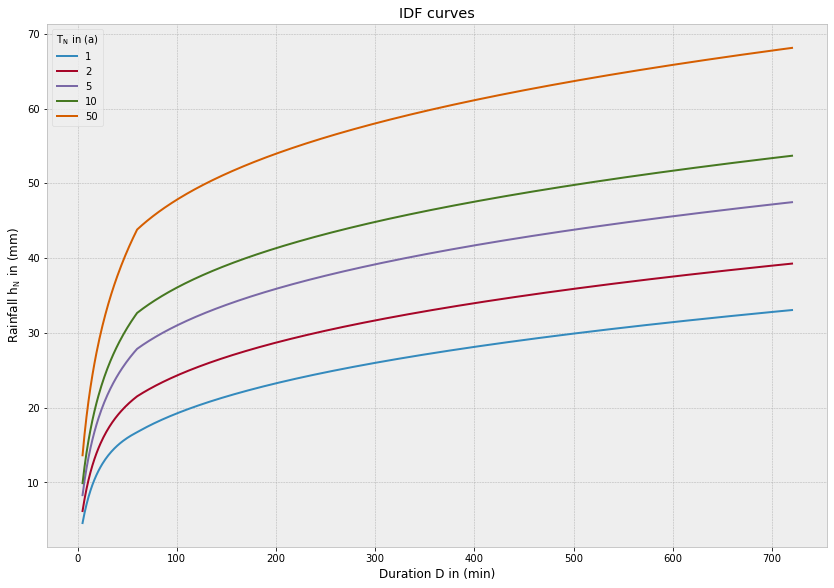

In [58]:
fig, ax = idf.result_figure(color=True)

----------------------------------------------------------------------------------

*Dieser Block funktioniert nur in einen laufenden Jupyter Notebook!*

In [ ]:
from ipywidgets import interact, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
def f(min_duration = 5, max_duration=720, color=True, logx=False):
    fig, ax = idf.result_figure(return_periods=[1,2,5,10,50], 
                            min_duration=min_duration, 
                            max_duration=max_duration, 
                            color=color, 
                            logx=logx)

In [ ]:
interact(f, min_duration = (0,60,5), max_duration=(60,8640, 60), color=True, logx=False)

----------------------------------------------------------------------------------

To save the plot as a png use:

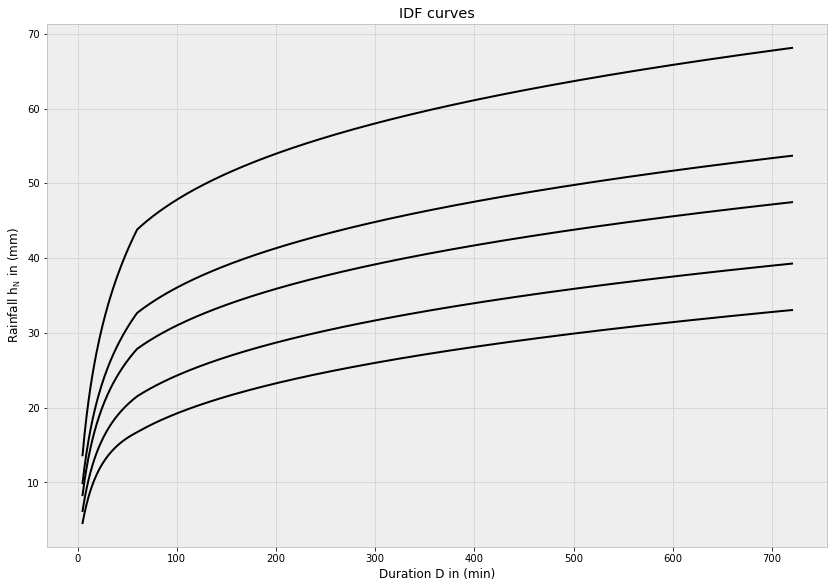

In [62]:
fig, ax = idf.result_figure()
fig.savefig(path.join(output_directory, 'idf_plot.png'), dpi=260)

In [63]:
! tree example/EXAMPLE_data
! dir example\EXAMPLE_data

Folder PATH listing
Volume serial number is 22B2-B9BA
C:\USERS\MP\PYCHARMPROJECTS\INTENSITY_DURATION_FREQUENCY_ANALYSIS\EXAMPLE\EXAMPLE_DATA
No subfolders exist 

 Volume in drive C has no label.
 Volume Serial Number is 22B2-B9BA

 Directory of C:\Users\mp\PycharmProjects\intensity_duration_frequency_analysis\example\EXAMPLE_data

16.03.2020  17:51    <DIR>          .
16.03.2020  17:51    <DIR>          ..
16.03.2020  18:24           251'106 idf_plot.png
16.03.2020  17:51            85'955 idf_plot_bw.png
16.03.2020  18:24             1'446 idf_table.csv
16.03.2020  17:49             1'790 parameters.yaml
               4 File(s)        340'297 bytes
               2 Dir(s)  912'104'321'024 bytes free
